## Análisis Árbol de Decisión Sobrevivientes del Titanic 

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Seleccionar los datos
datos = pd.read_csv ('train.csv')
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Totalidad de los datos
datos.shape

(891, 12)

In [4]:
# Unidades Estadisticas
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

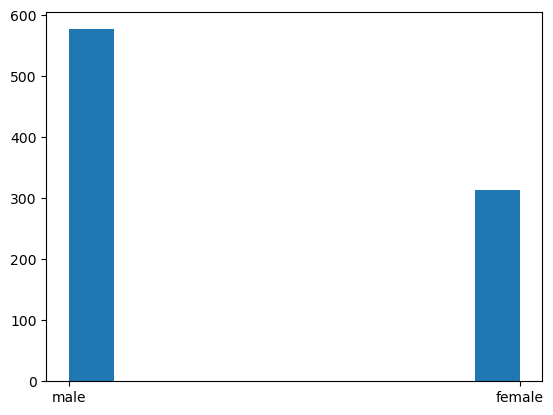

In [5]:
# Grafica de la Variable Sex
plt.hist(datos.Sex)

In [6]:
# Se definen las variables predictoras
predictors_col=['Survived','Pclass']
target_col=['Sex']

In [7]:
# llamamos las variables predictoras
predictors=datos[predictors_col]
target=datos[target_col]

In [8]:
# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

In [9]:
# Se crea el Arbol de Desicion
tree=DecisionTreeClassifier()

In [10]:
# Entrenar el Arbol de Desicion
arbol= tree.fit(X_train,y_train)

[Text(0.5555555555555556, 0.875, 'x[0] <= 0.5\ngini = 0.451\nsamples = 712\nvalue = [245, 467]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 2.5\ngini = 0.247\nsamples = 444\nvalue = [64, 380]'),
 Text(0.2222222222222222, 0.375, 'x[1] <= 1.5\ngini = 0.068\nsamples = 142\nvalue = [5, 137]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.089\nsamples = 64\nvalue = [3, 61]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.05\nsamples = 78\nvalue = [2, 76]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.314\nsamples = 302\nvalue = [59, 243]'),
 Text(0.7777777777777778, 0.625, 'x[1] <= 2.5\ngini = 0.438\nsamples = 268\nvalue = [181, 87]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= 1.5\ngini = 0.397\nsamples = 172\nvalue = [125, 47]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.438\nsamples = 99\nvalue = [67, 32]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.327\nsamples = 73\nvalue = [58, 15]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.486\nsamples = 96\nvalue = [56, 40]')]

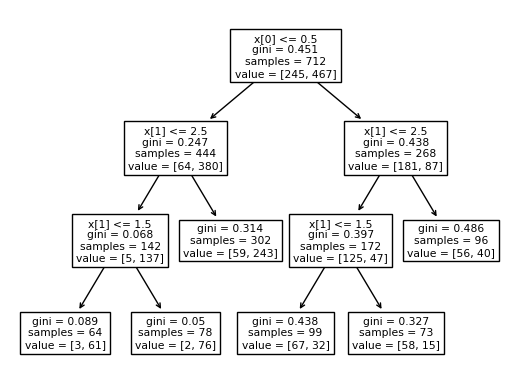

In [11]:
# Grafica el Arbol de Desicion
plot_tree(arbol)

In [12]:
# Prediccion de las Variables en X_test
predicciones=arbol.predict(X_test)

In [13]:
# Matriz de confusion
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones,rownames=['Actual'],colnames=['Predicciones'])

Predicciones,female,male
Actual,,
female,52,17
male,22,88


In [14]:
# Comparamos valores
accuracy=accuracy_score(y_test,predicciones)
accuracy

0.7821229050279329

## Análisis del Árbol de Decisión

1. Nodo Raíz:
Condición de División: x[0] <= 0.5 (La variable en el índice 0,Survived, es menor o igual a 0.5).
Índice Gini: 0.451 (Indica la impureza del nodo).
Número de Muestras: 712 (Total de muestras en este nodo).
Distribución de Clases: [245, 467] (245 no sobrevivieron y 467 sobrevivieron).

2. Nodo de la Izquierda:
Condición de División: x[1] <= 2.5 (La variable en el índice 1, Pclass, es menor o igual a 2.5).
Índice Gini: 0.247 (Menor impureza que el nodo raíz).
Número de Muestras: 444 (Total de muestras en este nodo).
Distribución de Clases: [64, 380] (64 no sobrevivieron y 380 sobrevivieron).

2.1. Nodo de la Izquierda del Nodo Izquierdo:
Condición de División: x[1] <= 1.5 (Pclass es menor o igual a 1.5).
Índice Gini: 0.068 (Baja impureza).
Número de Muestras: 142 (Total de muestras en este nodo).
Distribución de Clases: [5, 137] (5 no sobrevivieron y 137 sobrevivieron).

2.2. Nodo Derecho del Nodo Izquierdo:
Índice Gini: 0.314 (Mayor impureza que el nodo anterior).
Número de Muestras: 302 (Total de muestras en este nodo).
Distribución de Clases: [59, 243] (59 no sobrevivieron y 243 sobrevivieron).

3. Nodo de la Derecha:
Condición de División: x[1] <= 2.5 (Pclass es menor o igual a 2.5).
Índice Gini: 0.438 (Mayor impureza que el nodo raíz).
Número de Muestras: 268 (Total de muestras en este nodo).
Distribución de Clases: [181, 87] (181 no sobrevivieron y 87 sobrevivieron).

3.1. Nodo de la Izquierda del Nodo Derecho:
Condición de División: x[1] <= 1.5 (Pclass es menor o igual a 1.5).
Índice Gini: 0.397 (Mayor impureza que el nodo anterior).
Número de Muestras: 172 (Total de muestras en este nodo).
Distribución de Clases: [125, 47] (125 no sobrevivieron y 47 sobrevivieron).

3.2. Nodo Derecho del Nodo Derecho:
Índice Gini: 0.486 (Mayor impureza que el nodo anterior).
Número de Muestras: 96 (Total de muestras en este nodo).
Distribución de Clases: [56, 40] (56 no sobrevivieron y 40 sobrevivieron).
